# * Supermarket Sales *
### Historical record of sales data in 3 different supermarkets
#### Research Question: How can we increase the gross income for the three supermarkets in our data?

#### https://www.kaggle.com/aungpyaeap/supermarket-sales

#### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### * Importing Packages

In [194]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas import datetime
%matplotlib inline
import seaborn as seabornInstance
from datetime import datetime
from datetime import datetime as dt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


C:\Users\Soheila\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


#### * Reading CSV file from dataset to the dataframe

In [195]:
# Reading csv file (dataset) to the Dataframe  
df = pd.read_csv("Second_supermarket_sales - Sheet1.csv", index_col ="branch" )

In [196]:
df.dtypes

invoiceID        object
city             object
cust_type        object
gender           object
type             object
unit_price      float64
quantity          int64
date             object
time             object
payment          object
cost            float64
rating          float64
gross_income    float64
dtype: object

## 1. Data Cleaning

### 1.1. Checking for Null Values

In [197]:
df.isnull().any()

invoiceID       False
city            False
cust_type       False
gender          False
type            False
unit_price      False
quantity        False
date            False
time            False
payment         False
cost            False
rating          False
gross_income    False
dtype: bool

#### Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column.

In [198]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, A to A
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoiceID     1000 non-null   object 
 1   city          1000 non-null   object 
 2   cust_type     1000 non-null   object 
 3   gender        1000 non-null   object 
 4   type          1000 non-null   object 
 5   unit_price    1000 non-null   float64
 6   quantity      1000 non-null   int64  
 7   date          1000 non-null   object 
 8   time          1000 non-null   object 
 9   payment       1000 non-null   object 
 10  cost          1000 non-null   float64
 11  rating        1000 non-null   float64
 12  gross_income  1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 109.4+ KB
None


## 1.2. Outliers

In [199]:
df.dtypes

invoiceID        object
city             object
cust_type        object
gender           object
type             object
unit_price      float64
quantity          int64
date             object
time             object
payment          object
cost            float64
rating          float64
gross_income    float64
dtype: object

### 1.2.1. Outliers - Boxplot Method

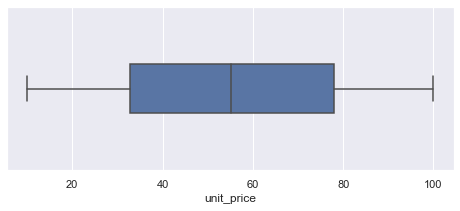

In [200]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['unit_price'], width=0.3)

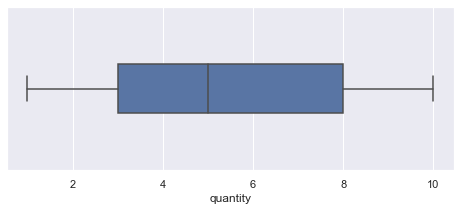

In [201]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['quantity'], width=0.3)

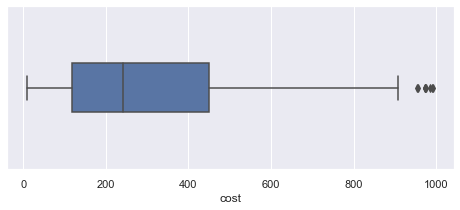

In [202]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['cost'], width=0.3)

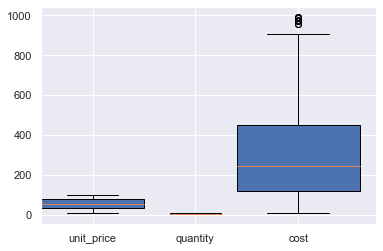

In [203]:
import matplotlib.pyplot as plt
 
value1 = df['unit_price']
value2 = df['quantity']
value3 = df['cost']
 
box_plot_data=[value1,value2,value3]
plt.boxplot(box_plot_data,patch_artist=True,labels=['unit_price','quantity','cost'], widths=(1, 0.5, 1.2))

#plt.boxplot(data, labels=labels, showfliers=False, widths=(1, 0.5, 1.2, 0.1))
plt.show()

### 1.2.2. Outliers - IQR Method

In [204]:
def calculate_outliers_iqr_method(values):
    """
    Calculate a list of outliers from a set of values using the IQR method
    :param values: pandas series of numerical values
    :returns: outliers: list of values that are outliers
    """
    q1 = values.quantile(q=0.25)
    q3 = values.quantile(q=0.75)
    iqr = q3 - q1
    
    outliers = []
    for value in values:
        if value > q3 + 1.5*iqr or value < q1 - 1.5*iqr:
            outliers.append(value)
    
    return outliers

In [205]:
calculate_outliers_iqr_method(df.cost)

[955.8, 972.1, 985.2, 973.8, 954.4, 989.8, 973.7, 975.0, 993.0]

In [206]:
calculate_outliers_iqr_method(df.unit_price)

[]

In [207]:
calculate_outliers_iqr_method(df.quantity)

[]

##  2. Visualiztion

In [208]:
# retrieving row by loc method for three supermarkets A, B, and C
superA = df.loc["A"] 
superB = df.loc["B"] 
superC = df.loc["C"] 
  
print(superA, "\n\n\n", superB, "\n\n\n", superC, "\n\n\n")

# making data frame for super markets A, B, C
df_superA = pd.DataFrame(superA, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])
df_superB = pd.DataFrame(superB, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])
df_superC = pd.DataFrame(superC, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])

#print(df_superA, "\n\n")
#print(df_superB, "\n\n")
#print(df_superC, "\n\n")                                            


          invoiceID   city cust_type  gender                    type  \
branch                                                                 
A       101-17-6199  Cairo    Normal    Male      Food and beverages   
A       105-10-6182  Cairo    Member    Male     Fashion accessories   
A       105-31-1824  Cairo    Member    Male       Sports and travel   
A       106-35-6779  Cairo    Member    Male      Home and lifestyle   
A       123-19-1176  Cairo    Member    Male       Health and beauty   
...             ...    ...       ...     ...                     ...   
A       886-54-6089  Cairo    Normal  Female      Home and lifestyle   
A       888-02-0338  Cairo    Normal    Male  Electronic accessories   
A       892-05-6689  Cairo    Normal  Female      Home and lifestyle   
A       896-34-0956  Cairo    Normal    Male     Fashion accessories   
A       898-04-2717  Cairo    Normal    Male     Fashion accessories   

        unit_price  quantity       date   time      payment    

In [209]:
# calling describe method for all three branches 

print("<<  Branch A Description  >> \n\n", df_superA.describe(), "\n\n")
print("<<  Branch B Description  >> \n\n", df_superB.describe(), "\n\n")
print("<<  Branch C Description  >> \n\n", df_superC.describe(), "\n\n")

<<  Branch A Description  >> 

        branch  unit_price    quantity        cost  gross income      rating
count     0.0  340.000000  340.000000  340.000000           0.0  340.000000
mean      NaN   54.780853    5.467647  297.480029           NaN    7.027059
std       NaN   26.132127    2.859876  220.609547           NaN    1.731345
min       NaN   10.080000    1.000000   12.090000           NaN    4.000000
25%       NaN   32.250000    3.000000  130.942500           NaN    5.600000
50%       NaN   53.235000    5.000000  229.360000           NaN    7.100000
75%       NaN   75.095000    8.000000  437.467500           NaN    8.500000
max       NaN   99.830000   10.000000  989.800000           NaN   10.000000 


<<  Branch B Description  >> 

        branch  unit_price    quantity        cost  gross income      rating
count     0.0  332.000000  332.000000  332.000000           0.0  332.000000
mean      NaN   55.659277    5.481928  304.640482           NaN    6.818072
std       NaN   26.22

In [210]:
byBranch = df.groupby("branch").gross_income.value_counts(normalize=True)
print(byBranch)

branch  gross_income
A       10.3260         0.005882
        0.6045          0.002941
        0.7670          0.002941
        0.7750          0.002941
        0.9140          0.002941
                          ...   
C       47.7900         0.003049
        48.6050         0.003049
        48.7500         0.003049
        49.2600         0.003049
        49.6500         0.003049
Name: gross_income, Length: 997, dtype: float64


In [211]:
byBranch.index

MultiIndex([('A', 10.325999999999999),
            ('A',             0.6045),
            ('A',              0.767),
            ('A',              0.775),
            ('A',              0.914),
            ('A',             0.9165),
            ('A',              0.985),
            ('A', 1.0659999999999998),
            ('A',              1.203),
            ('A',               1.25),
            ...
            ('C',              44.74),
            ('C',               44.9),
            ('C',             44.919),
            ('C',              45.25),
            ('C',              47.72),
            ('C',              47.79),
            ('C',             48.605),
            ('C',              48.75),
            ('C',              49.26),
            ('C',              49.65)],
           names=['branch', 'gross_income'], length=997)

In [212]:
byBranch.unstack()

gross_income,0.5085,0.6045,0.6270,0.6390,0.6990,0.7670,0.7715,0.7750,0.8140,0.8875,...,45.3250,47.7200,47.7900,48.6050,48.6850,48.6900,48.7500,49.2600,49.4900,49.6500
branch,,,,,,,,,,,,,,,,,,,,,
A,NaN,0.002941,NaN,NaN,NaN,0.002941,NaN,0.002941,NaN,NaN,...,0.002941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002941,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003012,...,NaN,NaN,NaN,NaN,0.003012,0.003012,NaN,NaN,NaN,NaN
C,0.003049,NaN,0.003049,0.003049,0.003049,NaN,0.003049,NaN,0.003049,NaN,...,NaN,0.003049,0.003049,0.003049,NaN,NaN,0.003049,0.003049,NaN,0.003049


### 2.1.  Visualiztion - Distribution Plot 

####  Comparing "cost", "unit price", "quantity" Distribution for Different Supermarkets

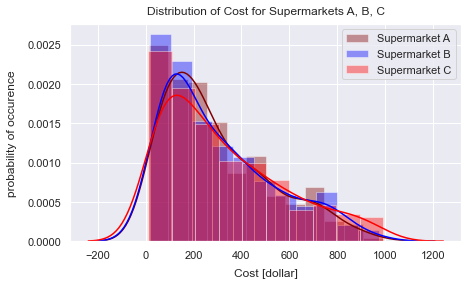

In [213]:
# Visualize the distribution of Cost in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['cost'], color="maroon", label = 'Supermarket A')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['cost'], color="blue", label = 'Supermarket B')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['cost'], color="red", label = 'Supermarket C')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of Cost for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()


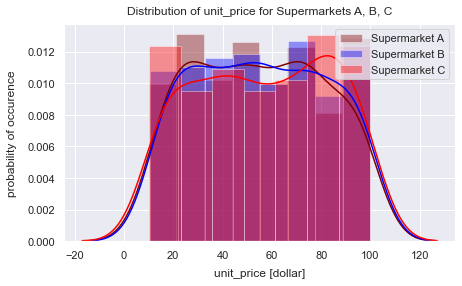

In [214]:
# Visualize the distribution of unit_price in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['unit_price'], color="maroon", label = 'Supermarket A')
plt.xlabel("unit_price [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['unit_price'], color="blue", label = 'Supermarket B')
plt.xlabel("unit_price [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['unit_price'], color="red", label = 'Supermarket C')
plt.xlabel("unit_price [dollar]", labelpad= 8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of unit_price for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()

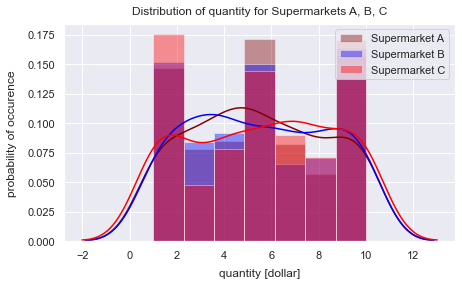

In [215]:
# Visualize the distribution of quantity in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['quantity'], color="maroon", label = 'Supermarket A')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['quantity'], color="blue", label = 'Supermarket B')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['quantity'], color="red", label = 'Supermarket C')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of quantity for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()

## 3. Handling Categorical Variables

### 3.1. Converting "day" to Parts-of-week Features

In [216]:
df_time = pd.read_csv("Second_supermarket_sales - Sheet1.csv" )
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480


In [217]:
dateNew = pd.to_datetime(df_time['date'])
print(dateNew)

0     2019-03-13
1     2019-01-17
2     2019-03-20
3     2019-03-05
4     2019-02-27
         ...    
995   2019-01-19
996   2019-02-16
997   2019-03-05
998   2019-01-26
999   2019-03-19
Name: date, Length: 1000, dtype: datetime64[ns]


In [218]:
df_time['day'] = dateNew.dt.day
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27


In [219]:
df_time['day_Name'] = dateNew.dt.day_name()
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,Wednesday
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,Thursday
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,Wednesday
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,Tuesday
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,Wednesday


In [220]:
dvar1 = 'weekend'
dvar2 = 'weekday'

for i in range(len(df_time.index)):
    if df_time.loc[i, 'day_Name'] == 'Saturday' or df_time.loc[i, 'day_Name'] == 'Sunday': 
         df_time.loc[i, 'day_Name1'] = dvar1
    else:
         df_time.loc[i, 'day_Name1'] = dvar2
        
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name,day_Name1
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,Wednesday,weekday
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,Thursday,weekday
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,Wednesday,weekday
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,Tuesday,weekday
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,Wednesday,weekday


In [221]:
df['day'] = df_time['day'].values

In [222]:
df['day_Name'] = df_time['day_Name1'].values

In [223]:
df.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name
branch,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,weekday
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,weekday
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,weekday
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,weekday
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,weekday


### 3.2. Converting "hour" to Parts-of-day Features

In [224]:
timeNew = pd.to_datetime(df_time['time'])
print(timeNew)

0     2020-05-18 19:44:00
1     2020-05-18 12:36:00
2     2020-05-18 17:52:00
3     2020-05-18 18:02:00
4     2020-05-18 12:22:00
              ...        
995   2020-05-18 19:39:00
996   2020-05-18 10:52:00
997   2020-05-18 19:46:00
998   2020-05-18 12:43:00
999   2020-05-18 15:49:00
Name: time, Length: 1000, dtype: datetime64[ns]


In [225]:
df_time = pd.DataFrame({'hour': timeNew.dt.hour})
df_time

,hour
0,19
1,12
2,17
3,18
4,12
...,...
995,19
996,10
997,19
998,12


In [226]:
for i in range(len(df_time.index)):
    if timeNew.dt.minute[i] > 30 and timeNew.dt.minute[i] < 60:
        df_time.loc[i, 'hour'] +=1
df_time.head(10)

,hour
0,20
1,13
2,18
3,18
4,12
5,15
6,11
7,15
8,12
9,20


In [227]:
var1 = 'morning'
var2 = 'afternoon'
var3 = 'evening'
var4 = 'night'

for i in range(len(df_time.index)):
    if df_time.loc[i, 'hour'] >= 10 and df_time.loc[i, 'hour'] <= 12:
         df_time.loc[i, 'time_of_day'] = var1
    else:
        if df_time.loc[i, 'hour'] > 12 and df_time.loc[i, 'hour'] <= 15:
            df_time.loc[i, 'time_of_day'] = var2
        else:
            if df_time.loc[i, 'hour'] > 15 and df_time.loc[i, 'hour'] <= 18:
                df_time.loc[i, 'time_of_day'] = var3
            else:
                if df_time.loc[i, 'hour'] > 18 and df_time.loc[i, 'hour'] <= 21:
                    df_time.loc[i, 'time_of_day'] = var4
        
df_time.head(10)

,hour,time_of_day
0,20,night
1,13,afternoon
2,18,evening
3,18,evening
4,12,morning
5,15,afternoon
6,11,morning
7,15,afternoon
8,12,morning
9,20,night


In [228]:
df['hour'] = df_time['hour'].values

In [229]:
df['time_of_day'] = df_time['time_of_day'].values

In [230]:
df = df[['invoiceID','city','cust_type','gender','type','unit_price','quantity','date','time','payment','cost','rating','day','day_Name','hour','time_of_day','gross_income']]
df.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income
branch,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480


In [231]:
# get the maximum values of all the column in dataframe
df['hour'].max()

21

In [232]:
df['hour'].min()

10

### 3.3. Dummy Variables - Categorical to Numerical

### 3.3.1. Dummy Variables - "city" Feature

In [233]:
# Creating Dummy Variable for Categorical Variable, "city" 
#print(df.head())
#df = pd.read_csv("Second_supermarket_sales - Sheet1.csv")
df_cityDummies = pd.get_dummies(df.city)
df_cityDummies

,Alexandria,Cairo,Ismailia
branch,,,
A,0,1,0
C,1,0,0
C,1,0,0
C,1,0,0
A,0,1,0
...,...,...,...
C,1,0,0
B,0,0,1
B,0,0,1


In [234]:
df_Result = pd.concat([df, df_cityDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Ismailia
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1,0


In [235]:
# Merging the Generated Dummy Variable for "city" to the Dataframe df
df_Merge1 = pd.concat([df, df_cityDummies], axis =1)
df_Merge1.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Ismailia
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1,0


In [236]:
df_Merge1 = df_Merge1.drop(['city',  'Ismailia'], axis= 'columns')
df_Merge1.head()

,invoiceID,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo
branch,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1
C,101-81-4070,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0
C,102-06-2002,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0
C,102-77-2261,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0
A,105-10-6182,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1


### 3.3.2. Dummy Variables - "type" Feature

In [237]:
# Creating Dummy Variable for Categorical Variable, "type" 
#print(df.head())
df_typeDummies = pd.get_dummies(df.type)
df_typeDummies

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,
A,0,0,1,0,0,0
C,0,0,0,1,0,0
C,0,0,0,0,0,1
C,0,0,0,1,0,0
A,0,1,0,0,0,0
...,...,...,...,...,...,...
C,0,0,1,0,0,0
B,0,1,0,0,0,0
B,0,0,1,0,0,0


In [238]:
df_Result = pd.concat([df_Result, df_typeDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,...,gross_income,Alexandria,Cairo,Ismailia,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,...,16.0265,0,1,0,0,0,1,0,0,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,...,6.2820,1,0,0,0,0,0,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,...,6.3125,1,0,0,0,0,0,0,0,1
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,...,22.8585,1,0,0,0,0,0,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,...,2.1480,0,1,0,0,1,0,0,0,0


In [239]:
# Merging the Generated Dummy Variable for "type" to the Dataframe df_Merge
df_Merge2 = pd.concat([df_Merge1, df_typeDummies], axis =1)
df_Merge2.head()
#print("\n\n", df_typeMerge.iloc[20])

,invoiceID,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,...,time_of_day,gross_income,Alexandria,Cairo,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,...,night,16.0265,0,1,0,0,1,0,0,0
C,101-81-4070,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,...,afternoon,6.2820,1,0,0,0,0,1,0,0
C,102-06-2002,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,...,evening,6.3125,1,0,0,0,0,0,0,1
C,102-77-2261,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,...,evening,22.8585,1,0,0,0,0,1,0,0
A,105-10-6182,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,...,morning,2.1480,0,1,0,1,0,0,0,0


In [240]:
df_Merge2 = df_Merge2.drop(['type','Electronic accessories'], axis= 'columns')
df_Merge2.head()

,invoiceID,cust_type,gender,unit_price,quantity,date,time,payment,cost,rating,...,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,...,20,night,16.0265,0,1,0,1,0,0,0
C,101-81-4070,Member,Female,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,...,13,afternoon,6.2820,1,0,0,0,1,0,0
C,102-06-2002,Member,Male,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,...,18,evening,6.3125,1,0,0,0,0,0,1
C,102-77-2261,Member,Male,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,...,18,evening,22.8585,1,0,0,0,1,0,0
A,105-10-6182,Member,Male,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,...,12,morning,2.1480,0,1,1,0,0,0,0


In [241]:
df_Merge2[df_Merge2.columns[9:]].head() 

,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,
A,7.0,13,weekday,20,night,16.0265,0,1,0,1,0,0,0
C,4.9,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0
C,6.1,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1
C,4.2,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0
A,6.6,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0


### 3.3.3. Dummy Variables - "date" Feature

In [242]:
# Creating Dummy Variable for Categorical Variable, "date" 
#print(df.head())
#df = pd.read_csv("Second_supermarket_sales - Sheet1.csv")
df_dateDummies = pd.get_dummies(df.day_Name)
df_dateDummies

,weekday,weekend
branch,,
A,1,0
C,1,0
C,1,0
C,1,0
A,1,0
...,...,...
C,0,1
B,0,1
B,1,0


In [243]:
df_Result = pd.concat([df_Result, df_dateDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,...,Cairo,Ismailia,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,...,1,0,0,0,1,0,0,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,...,0,0,0,0,0,1,0,0,1,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,...,0,0,0,0,0,0,0,1,1,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,...,0,0,0,0,0,1,0,0,1,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,...,1,0,0,1,0,0,0,0,1,0


In [244]:
df_Merge2[df_Merge2.columns[10:]].head() 

,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,
A,13,weekday,20,night,16.0265,0,1,0,1,0,0,0
C,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0
C,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1
C,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0
A,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0


In [245]:
# Merging the Generated Dummy Variable for "type" to the Dataframe df_Merge
#print(df_Final.head())
df_Merge3 = pd.concat([df_Merge2, df_dateDummies], axis =1)
df_Merge3.head()
#print("\n\n", df_typeMerge.iloc[20])

,invoiceID,cust_type,gender,unit_price,quantity,date,time,payment,cost,rating,...,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,...,16.0265,0,1,0,1,0,0,0,1,0
C,101-81-4070,Member,Female,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,...,6.2820,1,0,0,0,1,0,0,1,0
C,102-06-2002,Member,Male,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,...,6.3125,1,0,0,0,0,0,1,1,0
C,102-77-2261,Member,Male,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,...,22.8585,1,0,0,0,1,0,0,1,0
A,105-10-6182,Member,Male,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,...,2.1480,0,1,1,0,0,0,0,1,0


In [246]:
df_Merge3[df_Merge3.columns[10:]].head() 

,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,
A,13,weekday,20,night,16.0265,0,1,0,1,0,0,0,1,0
C,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0,1,0
C,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1,1,0
C,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0,1,0
A,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0,1,0


In [247]:
df_Merge3 = df_Merge3.drop(['date','day','day_Name','weekend'], axis= 'columns')
df_Merge3.head()

,invoiceID,cust_type,gender,unit_price,quantity,time,payment,cost,rating,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,19:44,Credit card,320.53,7.0,20,night,16.0265,0,1,0,1,0,0,0,1
C,101-81-4070,Member,Female,62.82,2,12:36,eWallet,125.64,4.9,13,afternoon,6.2820,1,0,0,0,1,0,0,1
C,102-06-2002,Member,Male,25.25,5,17:52,Cash,126.25,6.1,18,evening,6.3125,1,0,0,0,0,0,1,1
C,102-77-2261,Member,Male,65.31,7,18:02,Credit card,457.17,4.2,18,evening,22.8585,1,0,0,0,1,0,0,1
A,105-10-6182,Member,Male,21.48,2,12:22,eWallet,42.96,6.6,12,morning,2.1480,0,1,1,0,0,0,0,1


### 3.3.4. Dummy Variables - "time" Feature

In [248]:
# Creating Dummy Variable for Categorical Variable, "time"
#print(df.head())

df_timeDummies = pd.get_dummies(df.time_of_day)
df_timeDummies

,afternoon,evening,morning,night
branch,,,,
A,0,0,0,1
C,1,0,0,0
C,0,1,0,0
C,0,1,0,0
A,0,0,1,0
...,...,...,...,...
C,0,0,0,1
B,0,0,1,0
B,0,0,0,1


In [249]:
# Merging the Generated Dummy Variable for "time" to the Dataframe df_Merge
#print(df_Final.head())
df_Merge4 = pd.concat([df_Merge3, df_timeDummies], axis =1)
df_Merge4.head()
#print("\n\n", df_typeMerge.iloc[20])

,invoiceID,cust_type,gender,unit_price,quantity,time,payment,cost,rating,hour,...,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,afternoon,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,19:44,Credit card,320.53,7.0,20,...,0,1,0,0,0,1,0,0,0,1
C,101-81-4070,Member,Female,62.82,2,12:36,eWallet,125.64,4.9,13,...,0,0,1,0,0,1,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,17:52,Cash,126.25,6.1,18,...,0,0,0,0,1,1,0,1,0,0
C,102-77-2261,Member,Male,65.31,7,18:02,Credit card,457.17,4.2,18,...,0,0,1,0,0,1,0,1,0,0
A,105-10-6182,Member,Male,21.48,2,12:22,eWallet,42.96,6.6,12,...,1,0,0,0,0,1,0,0,1,0


In [250]:
df_Merge4[df_Merge4.columns[9:]].head() 

,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,afternoon,evening,morning,night
branch,,,,,,,,,,,,,,,
A,20,night,16.0265,0,1,0,1,0,0,0,1,0,0,0,1
C,13,afternoon,6.2820,1,0,0,0,1,0,0,1,1,0,0,0
C,18,evening,6.3125,1,0,0,0,0,0,1,1,0,1,0,0
C,18,evening,22.8585,1,0,0,0,1,0,0,1,0,1,0,0
A,12,morning,2.1480,0,1,1,0,0,0,0,1,0,0,1,0


In [251]:
df_Merge4 = df_Merge4.drop(['time','hour','time_of_day','afternoon'], axis= 'columns')
df_Merge4.head()

,invoiceID,cust_type,gender,unit_price,quantity,payment,cost,rating,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,Credit card,320.53,7.0,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,101-81-4070,Member,Female,62.82,2,eWallet,125.64,4.9,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,Cash,126.25,6.1,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,102-77-2261,Member,Male,65.31,7,Credit card,457.17,4.2,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,105-10-6182,Member,Male,21.48,2,eWallet,42.96,6.6,2.1480,0,1,1,0,0,0,0,1,0,1,0


In [252]:
df_Final = df_Merge4
df_Final.head()

,invoiceID,cust_type,gender,unit_price,quantity,payment,cost,rating,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,Credit card,320.53,7.0,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,101-81-4070,Member,Female,62.82,2,eWallet,125.64,4.9,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,Cash,126.25,6.1,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,102-77-2261,Member,Male,65.31,7,Credit card,457.17,4.2,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,105-10-6182,Member,Male,21.48,2,eWallet,42.96,6.6,2.1480,0,1,1,0,0,0,0,1,0,1,0


In [253]:
df_Final.iloc[0]

invoiceID              101-17-6199
cust_type                   Normal
gender                        Male
unit_price                   45.79
quantity                         7
payment                Credit card
cost                        320.53
rating                           7
gross_income               16.0265
Alexandria                       0
Cairo                            1
Fashion accessories              0
Food and beverages               1
Health and beauty                0
Home and lifestyle               0
Sports and travel                0
weekday                          1
evening                          0
morning                          0
night                            1
Name: A, dtype: object

In [254]:
df_Final.head()

,invoiceID,cust_type,gender,unit_price,quantity,payment,cost,rating,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,Credit card,320.53,7.0,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,101-81-4070,Member,Female,62.82,2,eWallet,125.64,4.9,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,Cash,126.25,6.1,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,102-77-2261,Member,Male,65.31,7,Credit card,457.17,4.2,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,105-10-6182,Member,Male,21.48,2,eWallet,42.96,6.6,2.1480,0,1,1,0,0,0,0,1,0,1,0


In [255]:
# Creating New Datafram including, 
# branch, unit_price , quantity, Alexandria, Cairo, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel, gross_income

df_Final1 = df_Final.drop(['invoiceID','cust_type','gender','payment','cost','rating'], axis= 'columns')
df_Final1

,unit_price,quantity,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,
A,45.79,7,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,62.82,2,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,25.25,5,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,65.31,7,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,21.48,2,2.1480,0,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,43.18,8,17.2720,1,0,0,1,0,0,0,0,0,0,1
B,36.51,9,16.4295,0,0,1,0,0,0,0,0,0,1,0
B,18.08,3,2.7120,0,0,0,1,0,0,0,1,0,0,1


In [256]:
df_Final1 = df_Final[['unit_price','quantity','Alexandria','Cairo','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel','weekday','evening','morning','night','gross_income' ]]
df_Final1.head()

,unit_price,quantity,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night,gross_income
branch,,,,,,,,,,,,,,
A,45.79,7,0,1,0,1,0,0,0,1,0,0,1,16.0265
C,62.82,2,1,0,0,0,1,0,0,1,0,0,0,6.2820
C,25.25,5,1,0,0,0,0,0,1,1,1,0,0,6.3125
C,65.31,7,1,0,0,0,1,0,0,1,1,0,0,22.8585
A,21.48,2,0,1,1,0,0,0,0,1,0,1,0,2.1480


## 4. Feature Importance

### 4.1. Feature Importance - Lasso Model

In [257]:
target = 'gross_income'
X = df_Final1.loc[:, df_Final1.columns != target]
y = df_Final1.loc[:, df_Final1.columns == target]

In [258]:
y1 = np.ravel(y)
reg = LassoCV()
reg.fit(X, y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.196472
Best score using built-in LassoCV: 0.890082


In [259]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
      str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

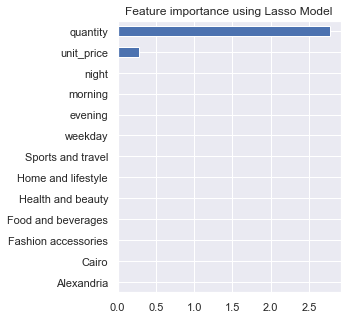

In [260]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### 4.2. Feature Importance - Seaborn Correlation Heatmap Model

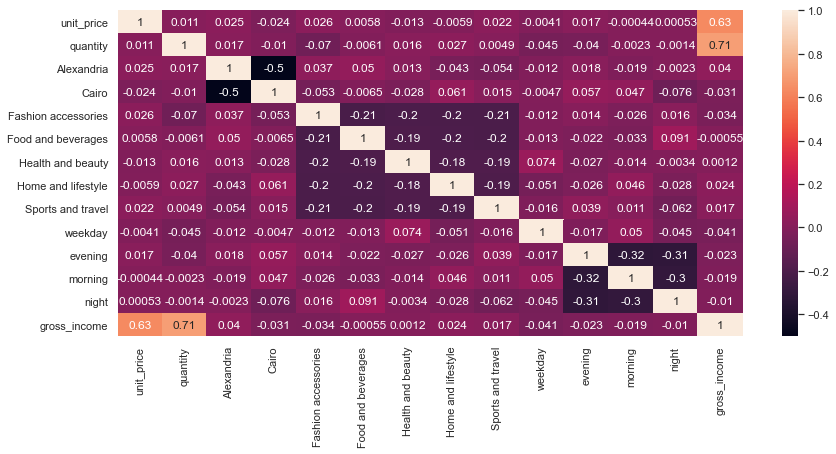

In [261]:
#Getting Correlations of Each Features in Dataset
corrmat = df_Final1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,6))
# Plotting heat Map
sns.heatmap(df_Final1[top_corr_features].corr(), annot=True )

### 4.3. Feature Importance - Seaborn pairplot Model

In [262]:
myData = pd.read_csv("Second_supermarket_sales - Sheet1.csv" )

In [263]:
myData.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480


In [264]:
myData_Features = myData[['unit_price', 'quantity', 'cost', 'gross_income']]

C:\Users\Soheila\Anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


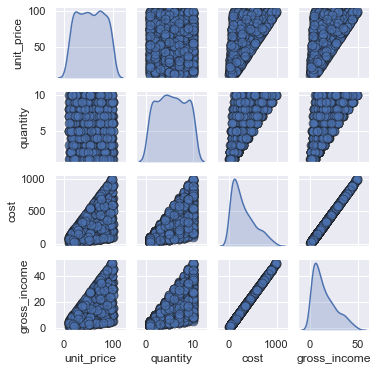

In [265]:
sns.pairplot(myData_Features,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 1.25)

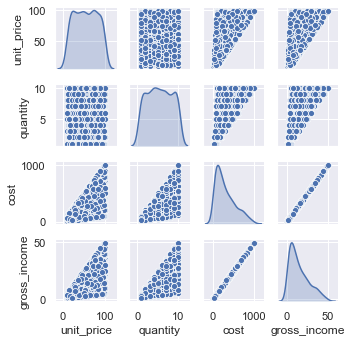

In [266]:
sns.pairplot(myData_Features, height=1.15,  diag_kind="kde", palette="Set2")
plot_kws={"s": 3}

### 4.4.1. Feature Importance - Scatter Plot for "cost" and "gross income"

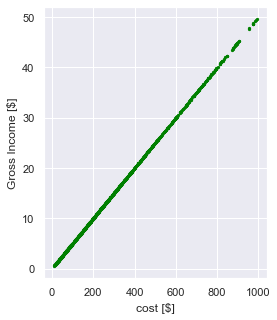

In [267]:
# Predicting "Gross Income" according to "Cost"
plt.xlabel('cost [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.cost, df.gross_income,20, color= 'green', marker = '.')

### 4.4.2. Feature Importance - Scatter Plot for "unit price" and "gross income"

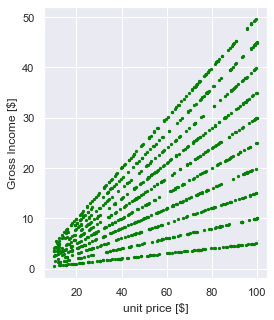

In [268]:
# Predicting "Gross Income" according to "unit price"
plt.xlabel('unit price [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.unit_price, df.gross_income,20, color= 'green', marker = '.')

### 4.4.3. Feature Importance - Scatter Plot for ""quantity" and "gross income" 

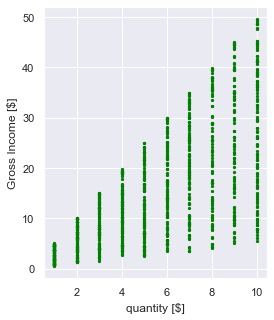

In [269]:
# Predicting "Gross Income" according to "quantity"
sizevalues =20
plt.xlabel('quantity [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.quantity, df.gross_income, s=sizevalues, color= 'green', marker = '.')

### 4.4. Feature Importance - Features Correlation using corr() Function

In [270]:
print(myData_Features.corr())

              unit_price  quantity      cost  gross_income
unit_price      1.000000  0.010778  0.633962      0.633962
quantity        0.010778  1.000000  0.705510      0.705510
cost            0.633962  0.705510  1.000000      1.000000
gross_income    0.633962  0.705510  1.000000      1.000000


In [271]:
print(df_Final1.corr())

                     unit_price  quantity  Alexandria     Cairo  \
unit_price             1.000000  0.010778    0.024717 -0.024157   
quantity               0.010778  1.000000    0.017291 -0.010403   
Alexandria             0.024717  0.017291    1.000000 -0.501441   
Cairo                 -0.024157 -0.010403   -0.501441  1.000000   
Fashion accessories    0.026034 -0.070485    0.036841 -0.052539   
Food and beverages     0.005836 -0.006084    0.050161 -0.006459   
Health and beauty     -0.013072  0.015709    0.012720 -0.027518   
Home and lifestyle    -0.005854  0.027446   -0.043459  0.061037   
Sports and travel      0.022257  0.004912   -0.054086  0.014524   
weekday               -0.004133 -0.045336   -0.012045 -0.004712   
evening                0.016586 -0.040263    0.018039  0.056769   
morning               -0.000436 -0.002282   -0.019042  0.047382   
night                  0.000528 -0.001446   -0.002319 -0.076499   
gross_income           0.633962  0.705510    0.040176 -0.03099

In [272]:
df_Final1

,unit_price,quantity,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night,gross_income
branch,,,,,,,,,,,,,,
A,45.79,7,0,1,0,1,0,0,0,1,0,0,1,16.0265
C,62.82,2,1,0,0,0,1,0,0,1,0,0,0,6.2820
C,25.25,5,1,0,0,0,0,0,1,1,1,0,0,6.3125
C,65.31,7,1,0,0,0,1,0,0,1,1,0,0,22.8585
A,21.48,2,0,1,1,0,0,0,0,1,0,1,0,2.1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,43.18,8,1,0,0,1,0,0,0,0,0,0,1,17.2720
B,36.51,9,0,0,1,0,0,0,0,0,0,1,0,16.4295
B,18.08,3,0,0,0,1,0,0,0,1,0,0,1,2.7120


## 5. Prediction Models

### 5.1. Prediction Models - (Multiple) Linear Regression Model

In [273]:
#column_names = ['unit_price','quantity','Alexandria','Cairo','Fashion accessories','Food and beverages','Health and beauty','Sports and travel','weekday','evening','morning','night','gross_income' ]
#column_names = ['unit_price','quantity','weekday','evening','morning','night','gross_income']
#column_names = ['unit_price','quantity','Alexandria','gross_income']
#column_names = ['unit_price','quantity','gross_income']
#column_names = ['unit_price','quantity','morning','gross_income']
#column_names = ['unit_price','quantity','evening','gross_income']
#column_names = ['unit_price','quantity','night','gross_income']
column_names = ['unit_price','quantity','gross_income']
#column_names = ['unit_price','quantity','weekday','gross_income']

df_Final1 = df_Final1.reindex(columns=column_names)
df_Final1.head()

,unit_price,quantity,gross_income
branch,,,
A,45.79,7,16.0265
C,62.82,2,6.2820
C,25.25,5,6.3125
C,65.31,7,22.8585
A,21.48,2,2.1480


In [274]:
df_Final1.dtypes

unit_price      float64
quantity          int64
gross_income    float64
dtype: object

#### checking the average value of the “gross income” column.

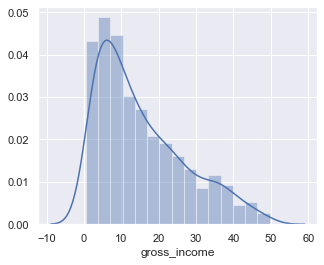

In [275]:
plt.figure(figsize=(5,4))
plt.tight_layout()
seabornInstance.distplot(df_Final1['gross_income'])

In [276]:
X = df_Final1.iloc[:, 0:2]  # independent columns
y = df_Final1.iloc[:,-1]    # target column(grosss_income)

print("x=", X)
print("y=", y)

x=         unit_price  quantity
branch                      
A            45.79         7
C            62.82         2
C            25.25         5
C            65.31         7
A            21.48         2
...            ...       ...
C            43.18         8
B            36.51         9
B            18.08         3
A            21.32         1
A            76.40         9

[1000 rows x 2 columns]
y= branch
A    16.0265
C     6.2820
C     6.3125
C    22.8585
A     2.1480
      ...   
C    17.2720
B    16.4295
B     2.7120
A     1.0660
A    34.3800
Name: gross_income, Length: 1000, dtype: float64


#### splitting 75% of the data to the training set while 25% of the data to test set using below code.The test_size variable is where weactually specify the proportion of the test set.

In [277]:
from sklearn.model_selection import train_test_split

y1 = np.ravel(y)
X_train, X_test, y_train, y_test=train_test_split(X, y1, test_size=0.25, random_state=0)

In [278]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

750 250 750 250


#### traing data - import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [279]:
# Now lets train our model.
from sklearn.linear_model import LinearRegression
regression=LinearRegression() # linear Regression Class Object
regression.fit(X_train, y_train) # Using fit method to train the model using traing set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [280]:
# Retrieving the intercept:
print(regression.intercept_)

-15.56898110373421


In [281]:
# Retrieving the slope (coefficient of x):
print(regression.coef_)

[0.27827938 2.80896537]


#### This means that for every one unit of change in each value of the features(unit_price, quantity,...),the change in the gross income is about one of the amount of above in %.

#### predicting data

In [282]:
# The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
y_pred = regression.predict(X_test)

type(y_pred)
#print(y_pred, len(y_pred))
#print(y_test)

numpy.ndarray

In [283]:
my_dict = {'Actual': y_test, 'Predicted': y_pred}
#my_dict

In [284]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### using test to make predictions on the test data

#### comparing the actual output values for X_test with the predicted values

In [285]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

In [286]:
X.shape

(1000, 2)

In [287]:
y.shape

(1000,)

In [288]:
# Calculation of Mean Squared Error (MSE) 
#mean_squared_error(Y_true,Y_pred)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

er = []
g = 0
r2 = 0
v1 = 0
for i in range(len(y_test)):
    #print( "actual=", y_test[i], " observed=",y_pred[i])
    x = (y_test[i] - y_pred[i]) **2
    er.append(x)
    g = g + x

#y = 0
#for i in range(len(y_test)):
#    y = y + ((y_test[i] - m) ** 2)
    
#r2 = 1-(g/y)
#v1= 1/(1-r2)
      

print ("(Multiple)Linear Regression ")
print ("---------------------------- ")
print("Mean Squared Error: %.2f"% mean_squared_error(y_test, y_pred, squared=False))
print('Test Variance Score: %.2f' % r2_score(y_test, y_pred))
v1 = np.var(er)

#print("Variance", v1)
print("Coefficient of determination R^2 of the prediction.: ", r2_score(y_test, y_pred))

(Multiple)Linear Regression 
---------------------------- 
Mean Squared Error: 3.79
Test Variance Score: 0.89
Coefficient of determination R^2 of the prediction.:  0.8896387367004186


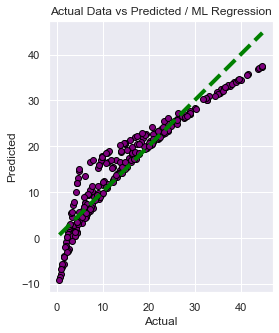

In [289]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0), color = 'purple')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color = 'green')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Data vs Predicted / ML Regression")
plt.show()

### 5.2. Prediction Models - Random Forest Regression Model

In [290]:
from sklearn.ensemble import RandomForestRegressor

In [291]:
X = df_Final1.iloc[:, 0:2]  # independent columns
y = df_Final1.iloc[:,-1]    # target column(grosss_income)
print(len(X), len(y))
print("x=", X)
print("y=", y)

1000 1000
x=         unit_price  quantity
branch                      
A            45.79         7
C            62.82         2
C            25.25         5
C            65.31         7
A            21.48         2
...            ...       ...
C            43.18         8
B            36.51         9
B            18.08         3
A            21.32         1
A            76.40         9

[1000 rows x 2 columns]
y= branch
A    16.0265
C     6.2820
C     6.3125
C    22.8585
A     2.1480
      ...   
C    17.2720
B    16.4295
B     2.7120
A     1.0660
A    34.3800
Name: gross_income, Length: 1000, dtype: float64


In [292]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y)

In [293]:
print(len(x_training_set), len(x_test_set), len(y_training_set), len(y_test_set))

750 250 750 250


In [294]:
print(x_training_set.shape, x_test_set.shape, y_training_set.shape, y_test_set.shape)

(750, 2) (250, 2) (750,) (250,)


In [295]:
n_estimators=100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_training_set, y_training_set)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [296]:
from sklearn.metrics import mean_squared_error, r2_score
   
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
#print(" coefficient of determination R^2 of the prediction.: ", model_score)
y_predicted = model.predict(x_test_set)

er = []
g = 0
r2 = 0
v1 = 0
x=0
for i in range(len(y_test_set)):
    #print( "actual=", y_test_set[i], " observed=",y_predicted[i])
    x = (y_test_set[i] - y_predicted[i]) **2
    er.append(x)
    g = g + x

#y = 0
#for i in range(len(y_test_set)):
#    y = y + ((y_test_set[i] - m) ** 2)
    
#r2 = 1-(g/y)
#v1= 1/(1-r2)



print ("Random Forest Regression ")
print ("------------------------ ")


# The mean squared error
print("Mean Squared Error(MSE): %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance Score: %.2f' % r2_score(y_test_set, y_predicted))

v1 = np.var(er)
#print ("variance", v1)

print("Coefficient of determination R^2 of the prediction.: ", model_score)

Random Forest Regression 
------------------------ 
Mean Squared Error(MSE): 0.07
Test Variance Score: 1.00
Coefficient of determination R^2 of the prediction.:  0.9999012153278324


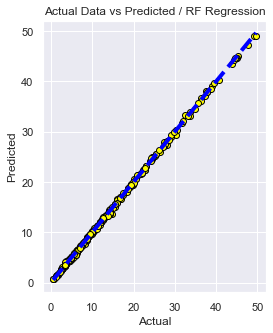

In [297]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0), color = 'yellow')
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4, color = 'blue')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Data vs Predicted / RF Regression")
plt.show()

#### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>